## Read climate data, analyze, and plot

In [1]:
## load libraries 
import aoespy as ap # for simple climate data plotting
import matplotlib.pyplot as plt # for plotting 
import xarray as xr # for reading cliamte data and modifying 
import numpy as np # modifying data

In [2]:
# reading data
dir='/project/airsea/pythontut2020/' # directory that contains the data

data=xr.open_dataset(dir+'sst_erai_1979_2016.nc')

In [3]:
data # print data

<xarray.Dataset>
Dimensions:  (lat: 256, lon: 513, time: 456)
Coordinates:
  * lon      (lon) float64 -180.0 -179.3 -178.6 -177.9 ... 178.6 179.3 180.0
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * time     (time) datetime64[ns] 1979-01-31 1979-02-28 ... 2016-12-31
Data variables:
    sst      (time, lat, lon) float64 ...

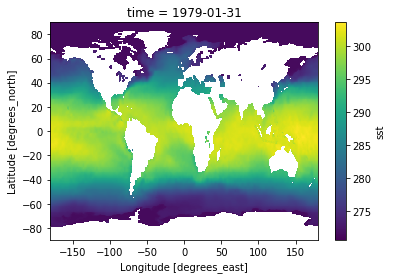

In [4]:
data.sst[0,:,:].plot()

([], <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f6ec9446518>)

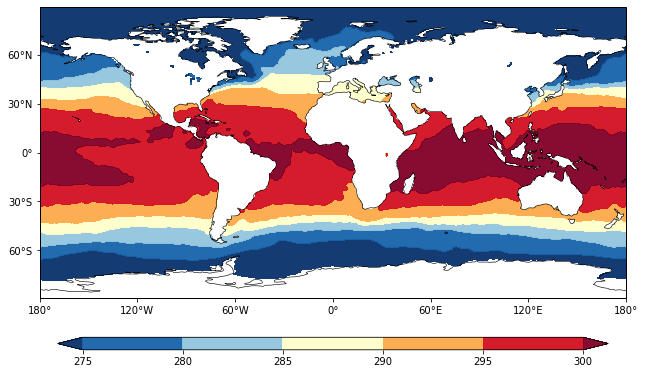

In [22]:
ap.f()
ap.plotc(data.sst[0,:,:],cmap=ap.cmap())

In [6]:
# Lets create seasonal data
annmean=data.sst.mean(dim='time')

# Seasonal mean

DJF=ap.season_ts(data, 'sst', 'DJF')
MAM=ap.season_ts(data, 'sst', 'MAM')
JJA=ap.season_ts(data, 'sst', 'JJA')
SON=ap.season_ts(data, 'sst', 'SON')

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# El Niño-Southern Oscillation, or “ENSO” 

The Oceanic Niño Index (ONI) is NOAA's primary indicator for monitoring El Niño and La Niña, which are opposite phases of the climate pattern called the El Niño-Southern Oscillation, or “ENSO” for short. NOAA considers El Niño conditions to be present when the Oceanic Niño Index is +0.5 or higher, indicating the east-central tropical Pacific is significanty warmer than usual. 
for more https://www.climate.gov/news-features/understanding-climate/climate-variability-oceanic-ni%C3%B1o-index#:~:text=%2D%2Dupdated%20Feb.,or%20%E2%80%9CENSO%E2%80%9D%20for%20short.

<img src="https://www.climate.gov/sites/default/files/styles/inline_all/public/Fig3_ENSOindices_SST_610.png?itok=2Daj8tjv" width=300 height=300 />

We want to produce a plot something like this 

<img src="https://www.researchgate.net/profile/Woosuk_Choi/publication/306922243/figure/fig1/AS:507211504984064@1497940054514/Time-series-of-normalized-Nino-34-index-anomaly-for-the-period-1954-2014.png" width=500 height=500 />



In [8]:
# Lets create elnino timeseries from DJF SST data
# Niño 3.4 (Lat 5N-5S, Lon -170, -120)
# slicing the data in lat lon dimension then taking mean of these

nino34=DJF.sel(lat=slice(-5,5),lon=slice(-170, -120)).mean(dim=['lat','lon']) 

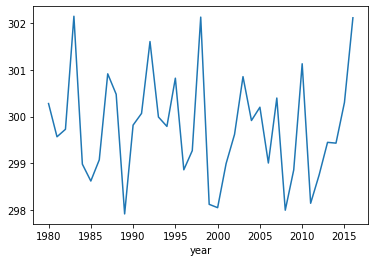

In [9]:
nino34.plot()

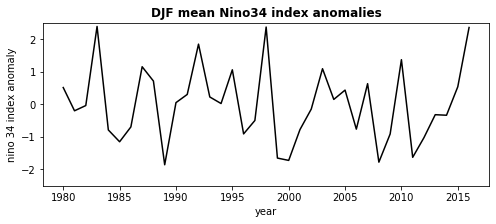

In [10]:
#lets create anomaly plot

plt.figure(figsize=(8,3))
(nino34-nino34.mean(dim='year')).plot(color='black')
plt.ylim((-2.5,2.5))
plt.ylabel('nino 34 index anomaly');
plt.title('DJF mean Nino34 index anomalies', fontweight='bold');

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


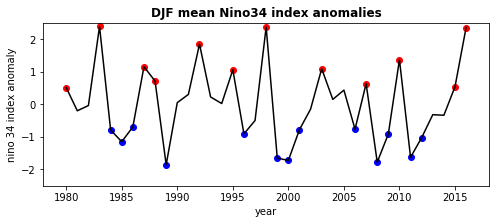

In [11]:
#lets create a more intersting plot, where red dot will show Elnino years, blue Lanina years

anom=(nino34-nino34.mean(dim='year'))
plt.figure(figsize=(8,3))
anom.plot(color='black')
plt.ylim((-2.5,2.5))
plt.ylabel('nino 34 index anomaly');
plt.title('DJF mean Nino34 index anomalies', fontweight='bold');
E=(np.nonzero(anom.data>=0.5))[0]; L=(np.nonzero(anom.data<=-0.5))[0]
plt.scatter(anom.year[E],anom[E],color='red');plt.scatter(anom.year[L],anom[L],color='blue')

# Exercise 1

## calculate DJF SST climatologies, anomalies, and plot 2016 DJF el nino year SST

(<Figure size 792x432 with 8 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f6ee0370240>)

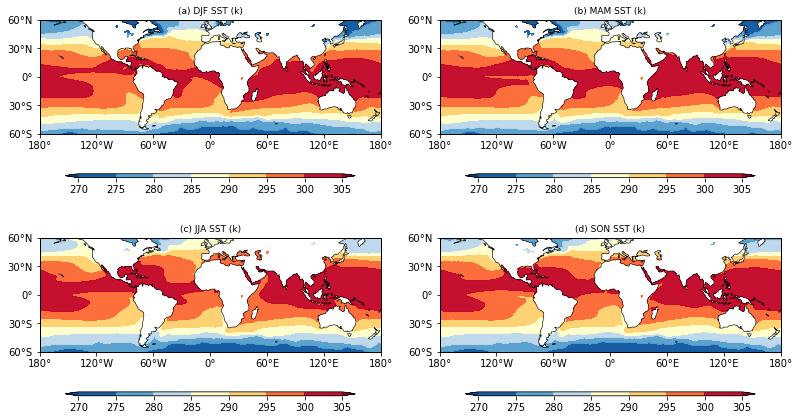

In [12]:
#lets create a multi panel plot

clf=np.arange(270,306,5)
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(11, 6), constrained_layout=True,
                          subplot_kw={'projection': ap.ccrs.PlateCarree()})
axlist = axarr.flatten()

ap.plotc(DJF.mean(dim='year'),title='(a) DJF SST (k)', clf=clf,lon1=-180, lon2=180, lat1=-60, lat2=60, cmap=ap.cmap(),ax=axlist[0], fig=fig)
ap.plotc(MAM.mean(dim='year'),title='(b) MAM SST (k)', clf=clf, lon1=-180, lon2=180, lat1=-60, lat2=60, cmap=ap.cmap(),ax=axlist[1], fig=fig)
ap.plotc(JJA.mean(dim='year'),title='(c) JJA SST (k)', clf=clf, lon1=-180, lon2=180, lat1=-60, lat2=60, cmap=ap.cmap(),ax=axlist[2], fig=fig)
ap.plotc(SON.mean(dim='year'),title='(d) SON SST (k)', clf=clf, lon1=-180, lon2=180, lat1=-60, lat2=60, cmap=ap.cmap(),ax=axlist[3], fig=fig)


# Exercise 2
Make JJA mean SLP plot from:
'/project/airsea/pythontut2020/slp_erai_1979_2016.nc'
# Exercise 3
Plot 2018 SON mean rainfall anomalies from climate:
'/project/airsea/pythontut2020/precip_GPCP_1979_2018.nc'

# Where to go Next


Python 3+ Basic:	 https://www.sololearn.com/Course/Python/ (or any good tutorial)

Colormaps:	https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
	http://colorbrewer2.org

Panda data frame structure for NETCDF: 	http://xarray.pydata.org/en/stable/

Matplotlib Basemap for different mapping projection and functions:
https://matplotlib.org/basemap/users/examples.html

More netcdf, python, CDO examples:	https://www.afahadabdullah.com/blog	

Last but no least, Google whatever you need from a large python community
https://www.google.com/	


<img src="https://www.androidcentral.com/sites/androidcentral.com/files/styles/large/public/article_images/2020/04/ricky-morty-s4-hero.jpg?itok=DCljRI72" width=500 height=500 />

# if you find any bug in the script or error generating data please contact 

Abdullah Al Fahad

Climate dynamics Doctoral Candidate

George Mason University, Fairfax, VA

afahad@gmu.edu